In [69]:
# NVDA volitility and moving average

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook


In [70]:
data = pd.read_csv("NVDA.csv", index_col=0, parse_dates=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.516724,45418600
2022-01-07,281.410004,284.220001,270.570007,272.470001,272.215424,40993900
2022-01-10,265.809998,274.690002,256.440002,274.000000,273.744049,59468100
2022-01-11,273.230011,280.649994,268.390015,278.170013,277.910156,40408900
2022-01-12,280.670013,285.950012,276.079987,279.989990,279.728394,38341300


In [71]:
data['%-chg'] = data['Close'].pct_change()

In [72]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg
Date,,,,,,,
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.516724,45418600,NaN
2022-01-07,281.410004,284.220001,270.570007,272.470001,272.215424,40993900,-0.033040
2022-01-10,265.809998,274.690002,256.440002,274.000000,273.744049,59468100,0.005615
2022-01-11,273.230011,280.649994,268.390015,278.170013,277.910156,40408900,0.015219
2022-01-12,280.670013,285.950012,276.079987,279.989990,279.728394,38341300,0.006543


In [73]:
# Testing whether the percentage change has been calculated correctly, which it does.
test1 = (272.470001-281.779999)/281.779999 * 100
print(str(test1)+" %")

-3.3039953272197833 %


In [74]:
# Calculating volatility, which is the standard deviation of the log return
# Using the Numpy library

import numpy as np

In [75]:
data['Log returns'] = np.log(data['Close']/data['Close'].shift())
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns
Date,,,,,,,,
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.516724,45418600,NaN,NaN
2022-01-07,281.410004,284.220001,270.570007,272.470001,272.215424,40993900,-0.033040,-0.033598
2022-01-10,265.809998,274.690002,256.440002,274.000000,273.744049,59468100,0.005615,0.005600
2022-01-11,273.230011,280.649994,268.390015,278.170013,277.910156,40408900,0.015219,0.015104
2022-01-12,280.670013,285.950012,276.079987,279.989990,279.728394,38341300,0.006543,0.006521


In [76]:
data['Close']/data['Close'].shift()
# Here are the differences between the log return and the percentage change.

Date
2022-01-06         NaN
2022-01-07    0.966960
2022-01-10    1.005615
2022-01-11    1.015219
2022-01-12    1.006543
                ...   
2022-12-29    1.040396
2022-12-30    1.000753
2023-01-03    0.979540
2023-01-04    1.030318
2023-01-05    0.967184
Name: Close, Length: 251, dtype: float64

In [77]:
data['Close'].shift()
# This illustrates how the formula works

Date
2022-01-06           NaN
2022-01-07    281.779999
2022-01-10    272.470001
2022-01-11    274.000000
2022-01-12    278.170013
                 ...    
2022-12-29    140.360001
2022-12-30    146.029999
2023-01-03    146.139999
2023-01-04    143.149994
2023-01-05    147.490005
Name: Close, Length: 251, dtype: float64

In [78]:
# Calculating the daily standard deviation (volatility)
data['Log returns'].std()

# To calculate the annual standard deviation (used a a measure of volatility), then the daily 
# volatility has to be multiplied by the square root of 252, because there are 252 trading
# days in a year.

0.03972736928452542

In [79]:
volatility = data['Log returns'].std()*252**.5
volatility

0.6306524362180818

In [80]:
str_vol = str(round(volatility, 3)*100)
str_vol

'63.1'

<IPython.core.display.Javascript object>


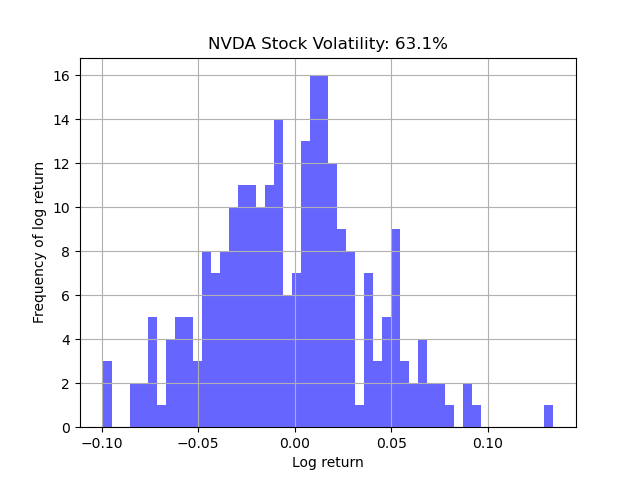

Text(0.5, 1.0, 'NVDA Stock Volatility: 63.1%')

In [81]:
# Visualising with a subplot

fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Frequency of log return")
ax.set_title("NVDA Stock Volatility: " + str_vol + "%")

# If there is a negative skew, and negatvie is more extreme, the reason is likely that when people panic,
# they really panic and everyone sells at the same time.

In [82]:
# Calculating a moving average: the average of the value of the last n days

data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns
Date,,,,,,,,
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.516724,45418600,NaN,NaN
2022-01-07,281.410004,284.220001,270.570007,272.470001,272.215424,40993900,-0.033040,-0.033598
2022-01-10,265.809998,274.690002,256.440002,274.000000,273.744049,59468100,0.005615,0.005600
2022-01-11,273.230011,280.649994,268.390015,278.170013,277.910156,40408900,0.015219,0.015104
2022-01-12,280.670013,285.950012,276.079987,279.989990,279.728394,38341300,0.006543,0.006521


In [83]:
# Rolling is how many data points are included from the average
data['Close'].rolling(2).sum()

Date
2022-01-06           NaN
2022-01-07    554.250000
2022-01-10    546.470001
2022-01-11    552.170013
2022-01-12    558.160003
                 ...    
2022-12-29    286.390000
2022-12-30    292.169998
2023-01-03    289.289993
2023-01-04    290.639999
2023-01-05    290.139999
Name: Close, Length: 251, dtype: float64

In [84]:
# Calculating a simple 10 day moving average

data['MA10'] = data['Close'].rolling(10).mean()
data.tail()

# Interpreting the result: the moving average being higher than the closing price is because there is a 
# downard trend.

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10
Date,,,,,,,,,
2022-12-29,144.020004,146.830002,142.270004,146.029999,146.029999,35492300,0.040396,0.039602,155.668001
2022-12-30,143.339996,146.289993,142.330002,146.139999,146.139999,31027300,0.000753,0.000753,153.330000
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.149994,40127700,-0.020460,-0.020672,151.073999
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.490005,43132400,0.030318,0.029867,149.569000
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.649994,38871200,-0.032816,-0.033366,147.748999


In [85]:
# Calculating a simple 50 day moving average

data['MA50'] = data['Close'].rolling(50).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10,MA50
Date,,,,,,,,,,
2022-12-29,144.020004,146.830002,142.270004,146.029999,146.029999,35492300,0.040396,0.039602,155.668001,152.681201
2022-12-30,143.339996,146.289993,142.330002,146.139999,146.139999,31027300,0.000753,0.000753,153.330000,153.193801
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.149994,40127700,-0.020460,-0.020672,151.073999,153.618000
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.490005,43132400,0.030318,0.029867,149.569000,154.074600
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.649994,38871200,-0.032816,-0.033366,147.748999,154.407800


In [86]:
# Calculating an exponential moving average
data['EMA10'] = data['Close'].ewm(span=10, adjust=False).mean()
data.tail()

# This puts more weight on the recent price action in the NVDA stock price.


,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10,MA50,EMA10
Date,,,,,,,,,,,
2022-12-29,144.020004,146.830002,142.270004,146.029999,146.029999,35492300,0.040396,0.039602,155.668001,152.681201,153.375569
2022-12-30,143.339996,146.289993,142.330002,146.139999,146.139999,31027300,0.000753,0.000753,153.330000,153.193801,152.060011
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.149994,40127700,-0.020460,-0.020672,151.073999,153.618000,150.440008
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.490005,43132400,0.030318,0.029867,149.569000,154.074600,149.903644
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.649994,38871200,-0.032816,-0.033366,147.748999,154.407800,148.584798


<IPython.core.display.Javascript object>


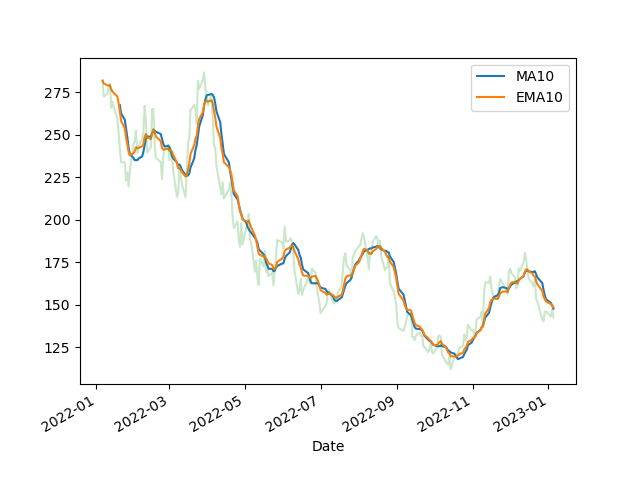

<AxesSubplot:xlabel='Date'>

In [89]:
fig, ax = plt.subplots()
data[['MA10', 'EMA10']].loc['2020-12-01':].plot(ax=ax)
data['Close'].loc['2020-12-01':].plot(ax=ax, alpha=0.25)

# The eponential moving average is more reactive (the orange line)